# ADTA_5560_Assignment_3_Submission

In [208]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN
#Dense layer (Fully connected layer)
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
#use the time to provide to generate input sequence to run train and test the model
from sklearn.preprocessing import MinMaxScaler
#use this to normalize the data in range 0 to 1

### Data generator

In [209]:
x = np.linspace(0,64,1024)
# np.linspace will generate (0+64) / 1024 dataset
y = np.sin(x)
x

array([0.00000000e+00, 6.25610948e-02, 1.25122190e-01, ...,
       6.38748778e+01, 6.39374389e+01, 6.40000000e+01])

In [210]:
y

array([0.        , 0.06252029, 0.12479597, ..., 0.86393146, 0.89372716,
       0.92002604])

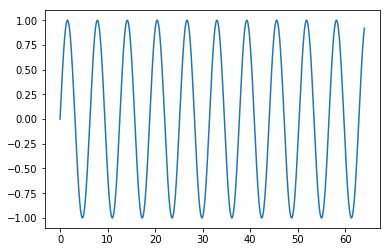

In [211]:
plt.plot(x,y)

In [212]:
df = pd.DataFrame(data= y, index=x, columns=['Sine'])
#use data y named Sine and index x
#x is not the real data. X is only index
df.head(5)

,Sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641


In [213]:
len(df)

1024

### Split Data --> Train/Test

In [214]:
test_percent = 0.2

In [215]:
len(df)*test_percent

204.8

In [216]:
test_length = np.round(len(df)*test_percent)

In [217]:
test_length

205.0

In [218]:
test_start_index = int(len(df)-test_length)

In [219]:
data_train = df.iloc[:test_start_index] 
data_test = df.iloc[test_start_index:] 
#df.iloc[:test_start_index] call the data from df from 0 to test_start_index(819-1 because the number is started from 0)

In [220]:
data_train.head(5)

,Sine
0.000000,0.000000
0.062561,0.062520
0.125122,0.124796
0.187683,0.186583
0.250244,0.247641


In [221]:
data_test.head(5)

,Sine
51.237537,0.826045
51.300098,0.859666
51.362659,0.889923
51.425220,0.916698
51.487781,0.939887


### Normalize Data(Scale the data to be zero to one)

In [222]:
scaler = MinMaxScaler()
# create minmax class

In [223]:
scaler.fit(data_train)
#train the data fit scaler

MinMaxScaler()

In [224]:
normalized_train = scaler.transform(data_train)
#normalized train
normalized_test = scaler.transform(data_test)

### Create TimeseriesGenerator Instance

In [225]:
#time generate time series to train time series 
length = 50
#use 50 history data points to predict future one

batch_size = 1
#batch = set of sample (1 sample = lenght = 50 historical data point)

train_tsGenerator50 = TimeseriesGenerator(normalized_train, normalized_train, length = length, batch_size = batch_size)
#create a Timeseries for training(input : normalized_train, normalized_train, lenght = length, batch_size = batch_size)
#provide constructure of class TimeseriesGenerator with 4 parameters as normalized_train, normalized_train, length, batch_size

In [226]:
#what does the first batch look like
X,y = train_tsGenerator50[0]

In [227]:
#flatten modify the x to be one demension array because it is the easy format to analyze
X.flatten()
#print

array([0.49999882, 0.53125908, 0.56239703, 0.59329085, 0.62381964,
       0.65386398, 0.6833063 , 0.7120314 , 0.73992691, 0.76688367,
       0.79279621, 0.81756315, 0.84108759, 0.86327747, 0.88404598,
       0.90331187, 0.92099975, 0.93704041, 0.9513711 , 0.96393574,
       0.97468518, 0.98357735, 0.99057747, 0.99565814, 0.99879949,
       0.99998922, 0.99922268, 0.99650287, 0.99184044, 0.98525361,
       0.97676818, 0.96641732, 0.95424156, 0.94028851, 0.92461278,
       0.90727571, 0.88834511, 0.86789506, 0.84600558, 0.82276231,
       0.79825619, 0.7725831 , 0.7458435 , 0.718142  , 0.68958699,
       0.66029019, 0.63036624, 0.59993221, 0.56910717, 0.53801175])

In [228]:
# y = the predicted from x
y

array([[0.50676759]])

### Build - Train - Test Recurrnt Neural Network

Build Simple RNN model

In [229]:
n_features = 1

model = Sequential()

model.add(SimpleRNN(100, input_shape=(length, n_features)))
#simple RNN added 100 which can use any number of RNN cell, but not too much for easlies to run

model.add(Dense(1))
#Fully conected layer

Complie Model

In [230]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_9 (SimpleRNN)     (None, 100)               10200     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


### Train (Fit) Model

In [231]:
history = model.fit_generator(train_tsGenerator50, epochs = 5)
#generate the data itself to train the model
#epochs = the times that model be trained 

Epoch 1/5


C:\Users\admin\AppData\Roaming\Python\Python36\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


769/769 [==============================] - 11s 12ms/step - loss: 0.0028
Epoch 2/5
769/769 [==============================] - 9s 12ms/step - loss: 1.2384e-04
Epoch 3/5
769/769 [==============================] - 9s 12ms/step - loss: 3.0598e-04
Epoch 4/5
769/769 [==============================] - 9s 12ms/step - loss: 4.9437e-05
Epoch 5/5
769/769 [==============================] - 9s 12ms/step - loss: 2.9262e-04


## Visualize model's performance after training

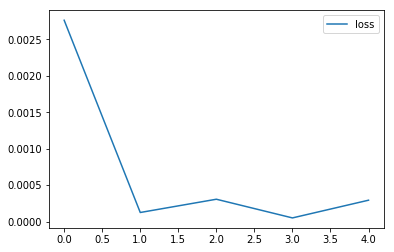

In [232]:
df_model_loss = pd.DataFrame(model.history.history)
df_model_loss.plot()

In [233]:
length

50

In [234]:
first_eval_batch = normalized_train[-length:]
first_eval_batch
#the last training of the first batch of dataset

array([[8.31976169e-02],
       [6.67457884e-02],
       [5.19891118e-02],
       [3.89853243e-02],
       [2.77853048e-02],
       [1.84328746e-02],
       [1.09646261e-02],
       [5.40977978e-03],
       [1.79006951e-03],
       [1.19657859e-04],
       [4.05080501e-04],
       [2.64522069e-03],
       [6.83131362e-03],
       [1.29469807e-02],
       [2.09682938e-02],
       [3.08638684e-02],
       [4.25949871e-02],
       [5.61157506e-02],
       [7.13732572e-02],
       [8.83078103e-02],
       [1.06853151e-01],
       [1.26936720e-01],
       [1.48479936e-01],
       [1.71398511e-01],
       [1.95602771e-01],
       [2.20998016e-01],
       [2.47484883e-01],
       [2.74959740e-01],
       [3.03315088e-01],
       [3.32439984e-01],
       [3.62220472e-01],
       [3.92540034e-01],
       [4.23280041e-01],
       [4.54320219e-01],
       [4.85539119e-01],
       [5.16814595e-01],
       [5.48024277e-01],
       [5.79046054e-01],
       [6.09758550e-01],
       [6.40041598e-01],


# The shape should be 3D :
The first_eval_batch: current is 2D array that need to be reshaping
first-axis : number of sample in the batch
 
second-axis : number of time series step, number of the features

In [235]:
#The first number (the number of sample in the batch) =1
#length = number of time series step
#n_features = number of the features
#three square bucket has 50 numbers in a batch

first_eval_batch = first_eval_batch.reshape((1,length, n_features))
first_eval_batch

array([[[8.31976169e-02],
        [6.67457884e-02],
        [5.19891118e-02],
        [3.89853243e-02],
        [2.77853048e-02],
        [1.84328746e-02],
        [1.09646261e-02],
        [5.40977978e-03],
        [1.79006951e-03],
        [1.19657859e-04],
        [4.05080501e-04],
        [2.64522069e-03],
        [6.83131362e-03],
        [1.29469807e-02],
        [2.09682938e-02],
        [3.08638684e-02],
        [4.25949871e-02],
        [5.61157506e-02],
        [7.13732572e-02],
        [8.83078103e-02],
        [1.06853151e-01],
        [1.26936720e-01],
        [1.48479936e-01],
        [1.71398511e-01],
        [1.95602771e-01],
        [2.20998016e-01],
        [2.47484883e-01],
        [2.74959740e-01],
        [3.03315088e-01],
        [3.32439984e-01],
        [3.62220472e-01],
        [3.92540034e-01],
        [4.23280041e-01],
        [4.54320219e-01],
        [4.85539119e-01],
        [5.16814595e-01],
        [5.48024277e-01],
        [5.79046054e-01],
        [6.0

In [236]:
first_eval_batch.shape
#shape of first_eval_batch

(1, 50, 1)

### Evaluated model

In [237]:
#Declear a list to store all the predictions
#Similar to: test_prediction = list()
test_prediction = []

frist_eval_batch = normalized_train[-length:]
# the last 50 data point of dataset

#reshape the last 50 data points to be 3D
current_batch = first_eval_batch.reshape((1,length,n_features))

# run 205 times same as the 205 data points intest_length
for i in range(len(data_test)):
    current_pred = model.predict(current_batch)[0]
    #get the predict value from the current_batch (first batch that has 50 data points)
    
    test_prediction.append(current_pred)
    #store prediction into the list of predictions
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    #drop the first data point and add the last data point to the end of the batch
    #current_batch[:,1:,:] = take the index 1 to the end which mean drop the 0 position 
    #and add the end of the list by [[current_pred]] on the axis=1
#do it 205 times

In [238]:
#transform the normalized data(0 to 1) into back to real value
true_predictions = scaler.inverse_transform(test_prediction)

true_predictions

array([[ 0.8216658 ],
       [ 0.85405854],
       [ 0.8806408 ],
       [ 0.90337893],
       [ 0.92210163],
       [ 0.93706532],
       [ 0.94735042],
       [ 0.954237  ],
       [ 0.95569457],
       [ 0.9540961 ],
       [ 0.94801799],
       [ 0.9383554 ],
       [ 0.92475153],
       [ 0.90815658],
       [ 0.88746574],
       [ 0.86404049],
       [ 0.83676276],
       [ 0.80712601],
       [ 0.77393743],
       [ 0.73868726],
       [ 0.70025862],
       [ 0.65987769],
       [ 0.61671682],
       [ 0.5719328 ],
       [ 0.52427012],
       [ 0.47562469],
       [ 0.42431982],
       [ 0.37213722],
       [ 0.31779122],
       [ 0.26268669],
       [ 0.20573776],
       [ 0.14837506],
       [ 0.08925725],
       [ 0.030272  ],
       [-0.03012308],
       [-0.09017996],
       [-0.15106141],
       [-0.21126032],
       [-0.27193179],
       [-0.33147088],
       [-0.39105027],
       [-0.44884862],
       [-0.50644321],
       [-0.56160294],
       [-0.6159974 ],
       [-0

In [239]:
data_test

,Sine
51.237537,0.826045
51.300098,0.859666
51.362659,0.889923
51.425220,0.916698
51.487781,0.939887
...,...
63.749756,0.794329
63.812317,0.830756
63.874878,0.863931
63.937439,0.893727


In [240]:
data_test['Predictions']=true_predictions
data_test

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sine,Predictions
51.237537,0.826045,0.821666
51.300098,0.859666,0.854059
51.362659,0.889923,0.880641
51.425220,0.916698,0.903379
51.487781,0.939887,0.922102
...,...,...
63.749756,0.794329,0.905228
63.812317,0.830756,0.929523
63.874878,0.863931,0.944027
63.937439,0.893727,0.960005


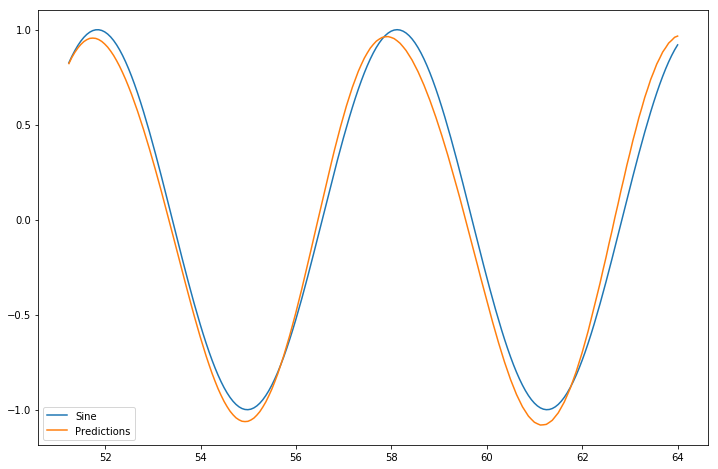

In [243]:
data_test.plot(figsize=(12,8))